In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


iris = load_iris(as_frame=False)

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
X = iris.data
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
std_enc = StandardScaler()
X_train = std_enc.fit_transform(X_train)
X_test = std_enc.transform(X_test)

In [13]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [14]:
y_pred = model.predict(X_train)

In [15]:
y_pred

array([1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2,
       0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       0, 1, 2])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.9777777777777777

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(random_state=42))

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

**One versus Rest Classification**

In [45]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def binary_cross_entropy(y, y_pred):
    m = y.shape[0]
    epsilon = 1e-8 
    return -1/m * np.sum(
        y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon)
    )

class LogisticRegression:
    """
    Supports both binary and multiclass classification.
    """
    def __init__(self, lr=0.001, tol=0.0001, max_iter=1000):
        self.lr = lr
        self.tol = tol
        self.max_iter = max_iter
        self.W = None
        self.b = None

    def fit_binary(self, X, y):
        #     # shape of X: (n, m)
        #     # n - observations
        #     # m - features

        #     # shape of y: (n,)
        #     # there are 2 distinct classes: 0 and 1
        X = np.array(X)
        y = np.array(y)
        m, n = X.shape  
        
        w = np.random.randn(n, 1)
        b = 0
        
        y = y.reshape(m, 1)
        for _ in range(self.max_iter):
            z = X @ w + b
            y_pred = sigmoid(z)
            dw = (1/m) * (X.T @ (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            w -= self.lr * dw
            b -= self.lr * db
            if np.linalg.norm(dw) < self.tol and abs(db) < self.tol:
                break
        return w, b
    

    def fit(self, X, y):
        # shape of X: (n, m)
        # n - observations
        # m - features
        X = np.array(X)
        y = np.array(y)

        # shape of y: (n,)
        # there are c distinct classes

        self.W = []
        self.b = []

        classes = np.unique(y)
        self.n_classes = len(classes)

        for class_ in classes:
            y_binary = y == class_
            w, b = self.fit_binary(X, y_binary)
            self.W.append(w)
            self.b.append(b)


    def predict_binary(self, X, w, b):
        logits = X @ w + b
        probs = sigmoid(logits)
        return probs

    def predict(self, X):
        n = X.shape[0]
        all_probs = []
        for w,b in zip(self.W, self.b): # type: ignore
            prob = self.predict_binary(X, w, b)
            all_probs.append(prob)
        return np.stack(all_probs, axis=1).reshape(n, self.n_classes).argmax(axis=1)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [46]:
log_reg.predict(X_train[0:2])

array([2, 0])

**Softmax function**

$$
\text{softmax}(x) = \frac{e^{x_i}}{\sum_{i=1}^{n} e^{x_i}}
$$

In [73]:
from sklearn.preprocessing import OneHotEncoder

y_train_one_hot = OneHotEncoder(sparse_output=False).fit_transform(y_train.reshape(-1, 1))

In [78]:
n_features = X_train.shape[1]
n, n_classes = y_train_one_hot.shape
print(f"{n=}")
print(f"{n_features=}")
print(f"{n_classes=}")

n=135
n_features=4
n_classes=3


In [ ]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=1, keepdims=True)

$$
\frac{\partial L}{\partial W} = \frac{1}{N}X^T(\hat{Y} - Y)
$$

$$
\frac{\partial L}{\partial b} = \frac{1}{N} \text{sum}(\hat{Y} - Y, axis=0)
$$

In [111]:
def cross_entropy(probs, y_true):
    n = probs.shape[0]
    return -(np.log(probs) * y_true).sum() / n

In [131]:
np.random.seed(42)
lr = 0.01

lossi = []

# W = np.random.randn(n_features, n_classes)
W = np.zeros((n_features, n_classes))
b = np.zeros(n_classes)
# print(f"{W=}")
# print(f"{b=}")

for _ in range(10000):
    logits = X_train @ W + b
    probs = softmax(logits)

    # Calculate loss
    loss = cross_entropy(probs, y_train_one_hot)
    lossi.append(loss)

    dW = X_train.T @ (probs - y_train_one_hot) / n
    db = np.sum(probs - y_train_one_hot, axis=0) / n

    W -= lr * dW
    b -= lr * db

In [137]:
lossi[0], lossi[-1]

(np.float64(1.0986122886681098), np.float64(0.12316660588152438))

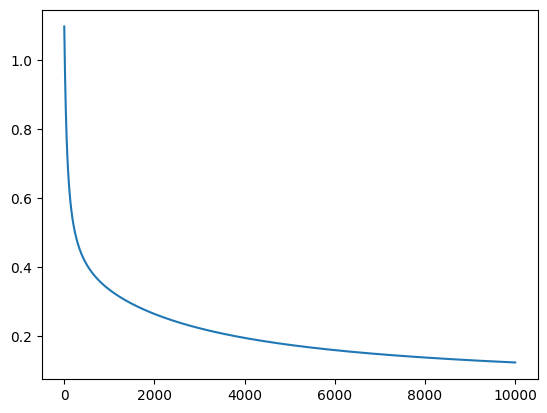

In [132]:
import matplotlib.pyplot as plt

plt.plot(lossi)
plt.show()

In [133]:
y_pred = probs.argmax(axis=1)
y_pred

array([1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2,
       0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       0, 1, 2])

In [134]:
y_train

array([1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       0, 1, 2])

In [135]:
accuracy_score(y_train, y_pred)

0.9703703703703703